In [1]:
# Initialization
import pylab as py
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from datetime import date
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Drug_Consumption.csv")
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [3]:
df.describe()

,ID,Nscore,Escore,Oscore,AScore,Cscore,Impulsive,SS
count,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000,1884.000000
mean,945.796178,-0.000119,0.000143,-0.000225,0.000242,-0.000383,0.007335,-0.002667
std,544.877779,0.998345,0.997625,0.996402,0.997481,0.997787,0.954674,0.963575
min,2.000000,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.750000,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.500000,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.250000,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


In [4]:
df.columns

Index(['ID', 'Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

In [5]:
cols = ['Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA']
for col in cols:
    df[col] = df[col].map(lambda x: x.lstrip('CL')).astype(int)
    
df

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,AScore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,2,25-34,M,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,4,0,2,0,2,3,0,4,0,0
1,3,35-44,M,Professional certificate/ diploma,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,0,0,0
2,4,18-24,F,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,2,0,0,0,0,2,0,0
3,5,35-44,F,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,1,0,0,1,0,0,2,2,0,0
4,6,65+,F,Left school at 18 years,Canada,White,-0.67825,-0.30033,-1.55521,2.03972,...,0,0,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1879,1884,18-24,F,"Some college or university, no certificate or ...",USA,White,-1.19430,1.74091,1.88511,0.76096,...,0,0,0,3,3,0,0,0,0,5
1880,1885,18-24,M,"Some college or university, no certificate or ...",USA,White,-0.24649,1.74091,0.58331,0.76096,...,2,0,0,3,5,4,4,5,0,0
1881,1886,25-34,F,University degree,USA,White,1.13281,-1.37639,-1.27553,-1.77200,...,4,0,2,0,2,0,2,6,0,0
1882,1887,18-24,F,"Some college or university, no certificate or ...",USA,White,0.91093,-1.92173,0.29338,-1.62090,...,3,0,0,3,3,0,3,4,0,0


In [6]:
# Remove unnecessary duplicates
print(f"Before removing: {df.shape}")
df = df.drop_duplicates().dropna()
print(f"After removing: {df.shape}")

Before removing: (1884, 32)
After removing: (1884, 32)


In [7]:
df['Ethnicity'].unique()

array(['White', 'Other', 'Mixed-White/Black', 'Asian',
       'Mixed-White/Asian', 'Black', 'Mixed-Black/Asian'], dtype=object)

In [8]:
print(f"Before removing: {df.shape}")
df = df.drop(df[(df.Semer == 1) | (df.Semer == 2) | (df.Semer == 3) | (df.Semer == 4)].index)
print(f"After removing: {df.shape}")

Before removing: (1884, 32)
After removing: (1876, 32)


In [9]:
#df.hist(figsize=(14,10), bins=50)

In [10]:
#num_cols = ['Nscore','Escore','AScore','Cscore', 'Impulsive','SS']
#drug_cols = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack','Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']
#for y_col in num_cols[:]:
#    for x_col in num_cols[:]:
#        sns.lmplot(x=x_col, y=y_col, data=df)

In [12]:
print(df['Age'].unique())

df['Age'] = df['Age'].replace({"18-24":"0", "25-34":"1", "35-44":"2", "45-54":"3", "55-64":"4", "65+":"5"})
df['Age'] = df['Age'].astype(int)
print(df['Age'].unique())

['25-34' '35-44' '18-24' '65+' '45-54' '55-64']
[1 2 0 5 3 4]


In [13]:
#df = df.drop(columns=['Gender','Education','Country','Ethnicity', 'Nscore', 'Escore', 'Oscore', 'AScore', 'Cscore', 'Impulsive', 'Cannabis', 'Nicotine', 'Caff', 'Alcohol', 'Choc', 'Mushrooms', 'Legalh', 'Semer'])
#df

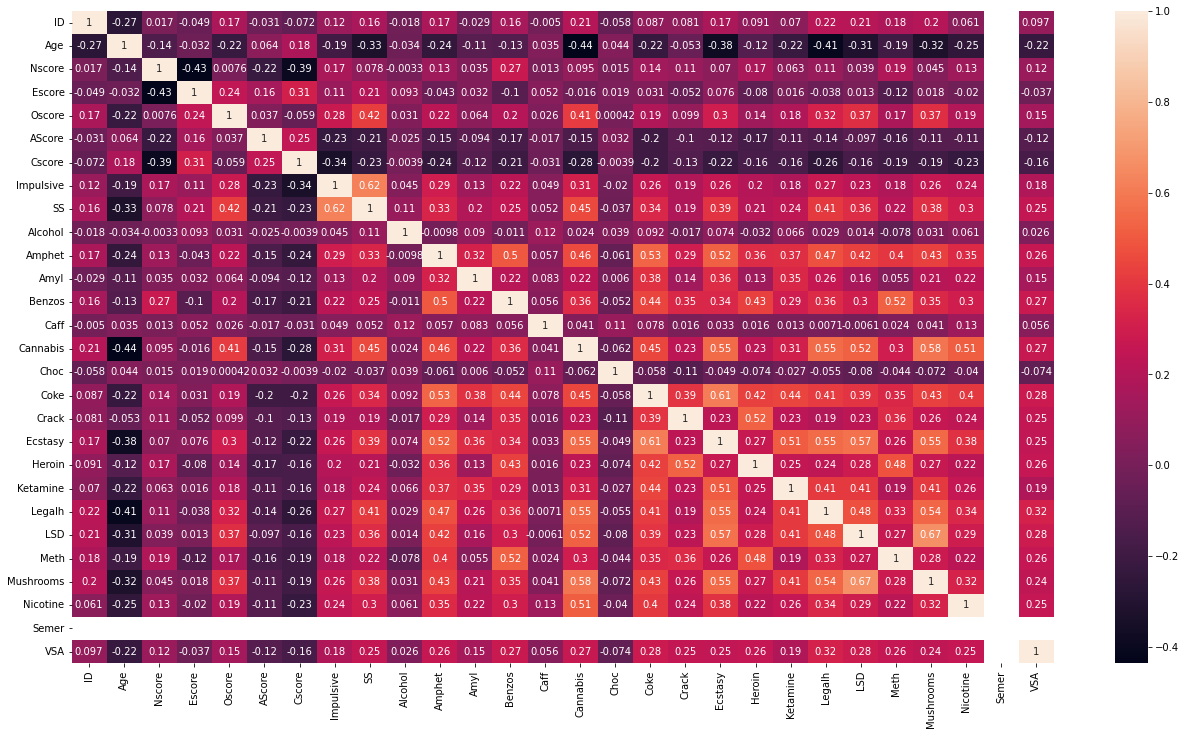

In [58]:
plt.figure(figsize = (22,12))
ax = sns.heatmap(df.corr(method='pearson'), annot=True)

In [14]:
col = ['Amphet', 'Amyl', 'Benzos', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth', 'VSA']
            
df_never = df[(df[col[0]] == 0) & (df[col[1]] == 0) & (df[col[2]] == 0) & 
              (df[col[3]] == 0) & (df[col[4]] == 0) & (df[col[5]] == 0) & 
              (df[col[6]] == 0) & (df[col[7]] == 0) & (df[col[8]] == 0) & 
              (df[col[9]] == 0) & (df[col[10]] == 0)]

df_active = df[(df[col[0]] == 4) | (df[col[0]] == 5) | (df[col[0]] == 6) |
              (df[col[1]] == 4) | (df[col[1]] == 5) | (df[col[1]] == 6) |
              (df[col[2]] == 4) | (df[col[2]] == 5) | (df[col[2]] == 6) |
              (df[col[3]] == 4) | (df[col[3]] == 5) | (df[col[3]] == 6) |
              (df[col[4]] == 4) | (df[col[4]] == 5) | (df[col[4]] == 6) |
              (df[col[5]] == 4) | (df[col[5]] == 5) | (df[col[5]] == 6) |
              (df[col[6]] == 4) | (df[col[6]] == 5) | (df[col[6]] == 6) |
              (df[col[7]] == 4) | (df[col[7]] == 5) | (df[col[7]] == 6) |
              (df[col[8]] == 4) | (df[col[8]] == 5) | (df[col[8]] == 6) |
              (df[col[9]] == 4) | (df[col[9]] == 5) | (df[col[9]] == 6) |
              (df[col[10]] == 4) | (df[col[10]] == 5) | (df[col[10]] == 6)]

#df_merged = pd.concat([df_never, df_active])
#df_ones_sometimes = pd.merge(df, df_merged, on='ID')
df_ones_sometimes = pd.concat([df, df_never, df_active]).drop_duplicates(keep = False)

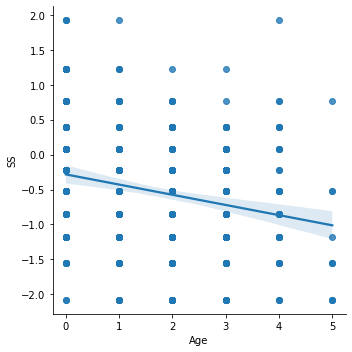

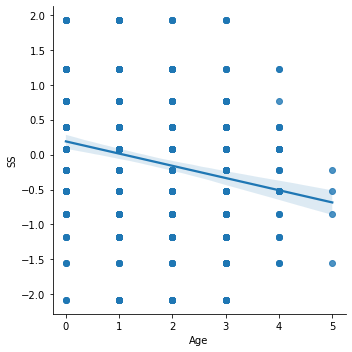

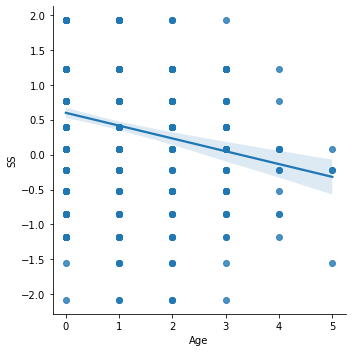

In [48]:
sns.lmplot(x='Age', y='SS', data=df_never)
sns.lmplot(x='Age', y='SS', data=df_ones_sometimes)
sns.lmplot(x='Age', y='SS', data=df_active)

In [16]:
df.dtypes

ID             int64
Age            int32
Gender        object
Education     object
Country       object
Ethnicity     object
Nscore       float64
Escore       float64
Oscore       float64
AScore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol        int32
Amphet         int32
Amyl           int32
Benzos         int32
Caff           int32
Cannabis       int32
Choc           int32
Coke           int32
Crack          int32
Ecstasy        int32
Heroin         int32
Ketamine       int32
Legalh         int32
LSD            int32
Meth           int32
Mushrooms      int32
Nicotine       int32
Semer          int32
VSA            int32
dtype: object

In [66]:
print(df['Alcohol'].mean())
print(df_never['Alcohol'].mean())
print(df_ones_sometimes['Alcohol'].mean())
print(df_active['Alcohol'].mean())

4.637526652452026
4.552795031055901
4.643366619115549
4.690751445086705


In [52]:
print(df_never['Semer'].value_counts())
print(df_ones_sometimes['Semer'].value_counts())
print(df_active['Semer'].value_counts())

0    483
Name: Semer, dtype: int64
0    701
Name: Semer, dtype: int64
0    692
Name: Semer, dtype: int64


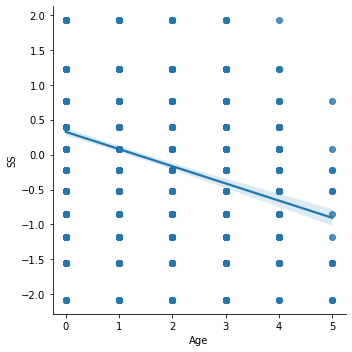

In [62]:
sns.lmplot(x='Age', y='SS', data=df)

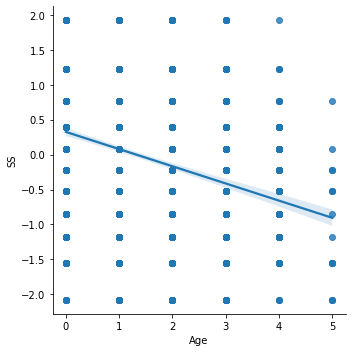

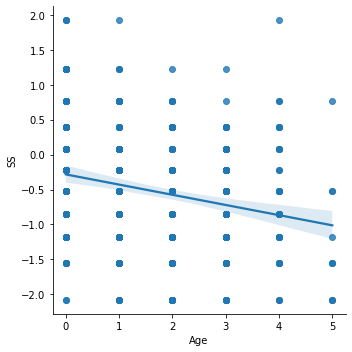

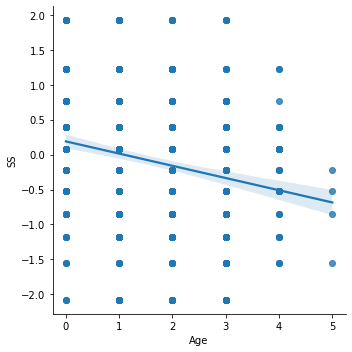

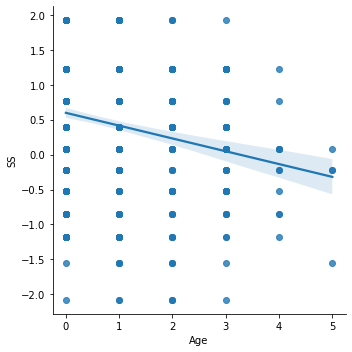

In [67]:
num_cols = ['Nscore','Escore','AScore','Cscore', 'Impulsive','SS']
drug_cols = ['Cannabis', 'Nicotine', 'Caff', 'Alcohol', 'Choc', 'Mushrooms', 'Legalh']
col = ['Amphet', 'Amyl', 'Benzos', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth', 'VSA']
dataframes = [df, df_never, df_ones_sometimes, df_active]

#for y_col in drug_cols[:]:
for d in dataframes[:]:
    sns.lmplot(x='Age', y='SS', data=d)